In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

### 데이터 불러오기

In [2]:
df = pd.read_csv(r'C:\Users\Jimin\Documents\춘천시\춘천시데이터_업종별지역.csv', encoding = 'CP949')
df.head()

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,127.750995,강원,춘천시,석사동,551,26.17,73.83,0.97,2.47,1.36,4.14,91.06,2021-12-21
1,여의도순복음춘천교회,2021-07-19,종교시설,37.849759,127.755033,강원,춘천시,동내면 거두리,79,42.50,57.50,13.22,18.84,25.55,21.69,20.70,2021-12-21
2,디자인카페티이오,2021-07-19,카페,37.884288,127.728886,강원,춘천시,요선동,95,46.24,53.76,13.52,20.90,21.89,21.74,21.95,2021-12-21
3,브이스페이스(VSpace),2021-07-19,카페,37.815480,127.716347,강원,춘천시,신동면 증리,72,55.17,44.83,10.38,20.74,20.02,22.26,26.60,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,127.745546,강원,춘천시,석사동,315,28.96,71.04,15.33,21.03,19.13,22.74,21.77,2021-12-21


### 데이터 전처리

In [3]:
df = df.groupby(['상호명', '업종']).mean()
df.head()

,,위도,경도,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율
상호명,업종,,,,,,,,,,
emart24(백령마을),편의점,37.865568,127.738259,110.639344,52.842705,47.157295,12.965328,20.530164,23.040574,21.432049,22.031885
#탁구세상,실내집단운동시설,37.874463,127.745691,195.549180,51.854508,48.145492,11.548607,18.544672,21.679098,19.795984,28.431639
(사)강원도지체장애인협회,공공시설,37.896988,127.749960,83.991803,52.214098,47.785902,16.090492,15.300164,23.959344,25.343279,19.306721
(사)문화프로덕션도모,관광시설,37.817971,127.719708,75.196721,57.329344,42.670656,9.650000,20.095656,19.246639,21.537377,29.470328
(주)SC이엔지,기타시설,37.858098,127.745978,1058.368852,35.521230,64.478770,15.350984,21.102541,19.658607,22.001230,21.886639


### 데이터 살펴보기 (상자그림)

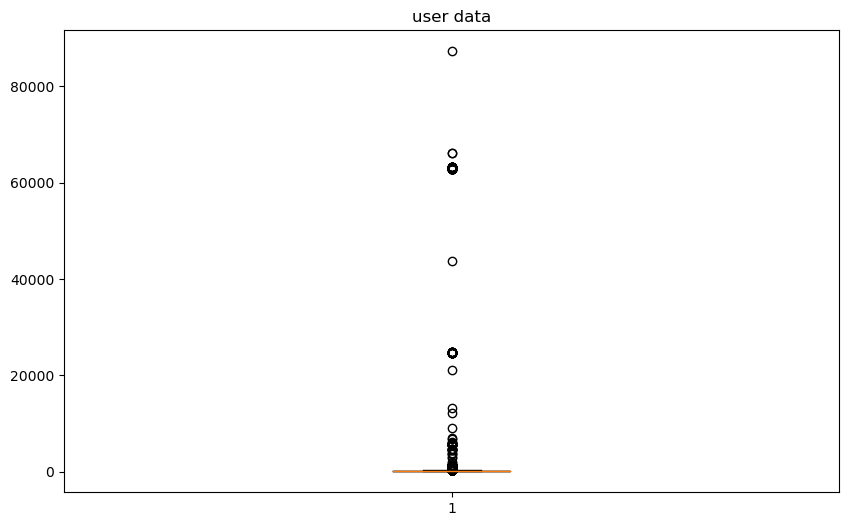

count     7998.000000
mean       807.534366
std       6092.521306
min         69.442623
25%         88.663934
50%        113.622951
75%        167.227459
max      87294.483607
Name: 이용자수, dtype: float64


In [4]:
plt.boxplot(df['이용자수'])
plt.title('user data')
plt.show()
print(df['이용자수'].describe())

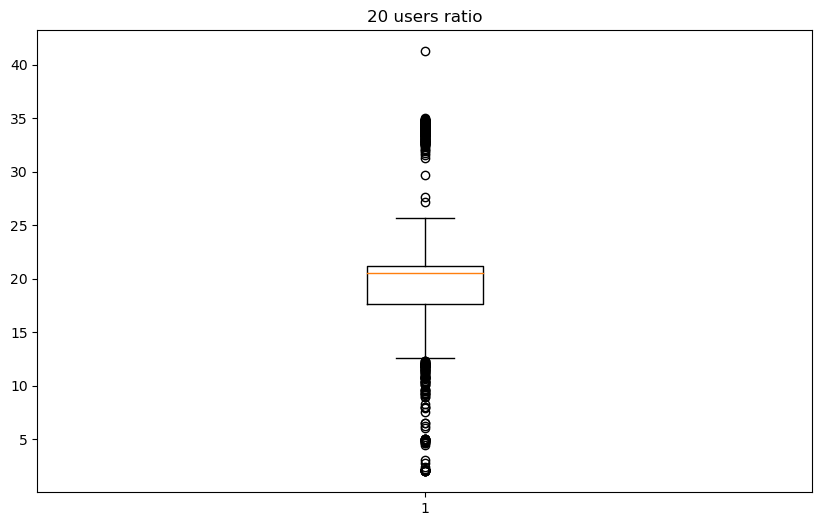

count    7998.000000
mean       19.353533
std         3.522036
min         2.012131
25%        17.684693
50%        20.564795
75%        21.150205
max        41.248852
Name: 20대비율, dtype: float64


In [5]:
plt.boxplot(df['20대비율'])
plt.title('20 users ratio')
plt.show()
print(df['20대비율'].describe())

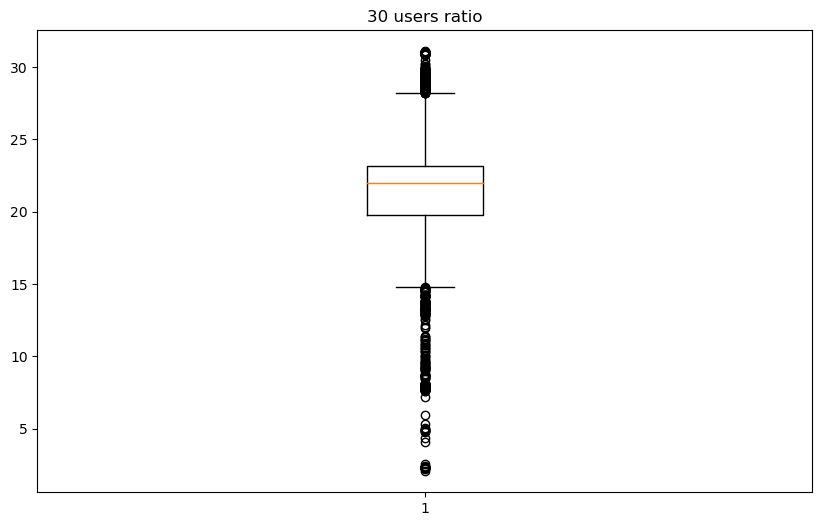

count    7998.000000
mean       21.541176
std         3.758424
min         2.060656
25%        19.796865
50%        22.008484
75%        23.149098
max        31.085656
Name: 30대비율, dtype: float64


In [6]:
plt.boxplot(df['30대비율'])
plt.title('30 users ratio')
plt.show()
print(df['30대비율'].describe())

### 데이터 전처리

In [7]:
# 4분위수 구하기
user_Q1 = df['이용자수'].quantile(.25)
user_Q2 = df['이용자수'].quantile(.5)
user_Q3 = df['이용자수'].quantile(.75)
user_Q4 = df['이용자수'].quantile(1)
user_IQR = user_Q3 - user_Q1

user_min = user_Q2 - 1.5*user_IQR
user_max = user_Q2 + 1.5*user_IQR

In [8]:
twenty_Q1 = df['20대비율'].quantile(.25)
twenty_Q2 = df['20대비율'].quantile(.5)
twenty_Q3 = df['20대비율'].quantile(.75)
twenty_Q4 = df['20대비율'].quantile(1)
twenty_IQR = twenty_Q3 - twenty_Q1

twenty_min = twenty_Q2 - 1.5*twenty_IQR
twenty_max = twenty_Q2 + 1.5*twenty_IQR

In [9]:
thirty_Q1 = df['30대비율'].quantile(.25)
thirty_Q2 = df['30대비율'].quantile(.5)
thirty_Q3 = df['30대비율'].quantile(.75)
thirty_Q4 = df['30대비율'].quantile(1)
thirty_IQR = thirty_Q3 - thirty_Q1

thirty_min = thirty_Q2 - 1.5*thirty_IQR
thirty_max = thirty_Q2 - 1.5*thirty_IQR

In [10]:
Df = df[(df['이용자수']>=user_Q1) & (df['이용자수'] < user_max) & (df['20대비율']>=twenty_Q1) & (df['30대비율']>=thirty_Q1)]

In [11]:
Df.head()

,,위도,경도,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율
상호명,업종,,,,,,,,,,
emart24(백령마을),편의점,37.865568,127.738259,110.639344,52.842705,47.157295,12.965328,20.530164,23.040574,21.432049,22.031885
#탁구세상,실내집단운동시설,37.874463,127.745691,195.549180,51.854508,48.145492,11.548607,18.544672,21.679098,19.795984,28.431639
(주)도화전기,기타시설,37.876324,127.735091,156.967213,47.345902,52.654098,13.329344,20.643033,23.126885,21.182541,21.718197
(주)동서엔지니어링,기타시설,37.858317,127.741909,142.262295,49.975574,50.024426,15.588852,21.300902,19.929098,21.641885,21.539262
(주)리저브카본,기타시설,37.856751,127.741591,90.704918,39.088934,60.911066,15.628607,21.429016,20.435492,20.035000,22.471885


### 결과 확인하기

In [12]:
print(df['이용자수'].describe())
print('\n',Df['이용자수'].describe())

count     7998.000000
mean       807.534366
std       6092.521306
min         69.442623
25%         88.663934
50%        113.622951
75%        167.227459
max      87294.483607
Name: 이용자수, dtype: float64

 count    2964.000000
mean      125.462228
std        31.806634
min        88.663934
25%       100.137295
50%       116.282787
75%       142.588115
max       231.368852
Name: 이용자수, dtype: float64


In [13]:
print(df['20대비율'].describe())
print('\n',Df['20대비율'].describe())

count    7998.000000
mean       19.353533
std         3.522036
min         2.012131
25%        17.684693
50%        20.564795
75%        21.150205
max        41.248852
Name: 20대비율, dtype: float64

 count    2964.000000
mean       20.934387
std         3.236052
min        17.966107
25%        18.894734
50%        20.675082
75%        21.177029
max        34.974098
Name: 20대비율, dtype: float64


In [14]:
print(df['30대비율'].describe())
print('\n',Df['30대비율'].describe())

count    7998.000000
mean       21.541176
std         3.758424
min         2.060656
25%        19.796865
50%        22.008484
75%        23.149098
max        31.085656
Name: 30대비율, dtype: float64

 count    2964.000000
mean       22.865584
std         2.273438
min        19.797049
25%        21.551885
50%        22.820738
75%        23.599078
max        30.877705
Name: 30대비율, dtype: float64


### 변경된 값 시각화

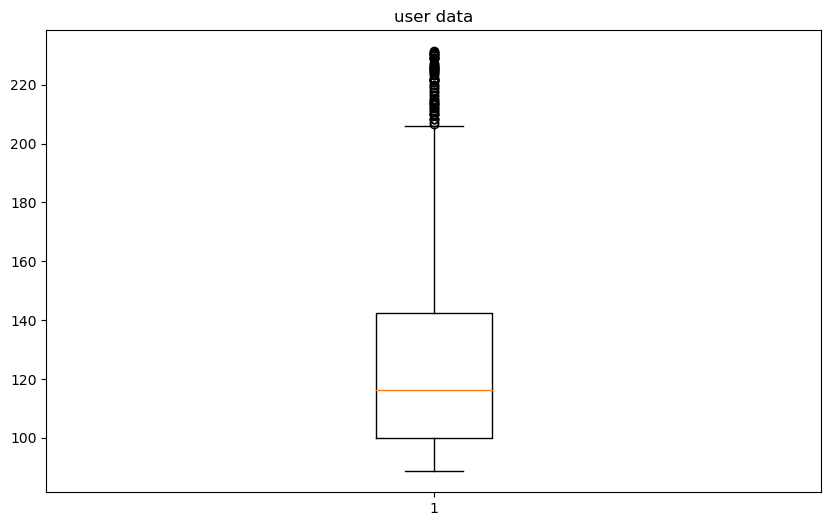

In [20]:
plt.boxplot(Df['이용자수'])
plt.title('user data')
plt.show()

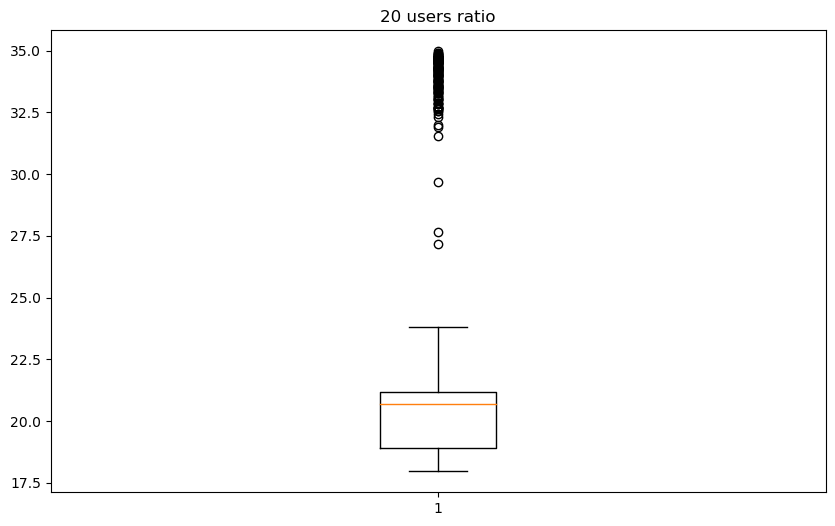

In [21]:
plt.boxplot(Df['20대비율'])
plt.title('20 users ratio')
plt.show()

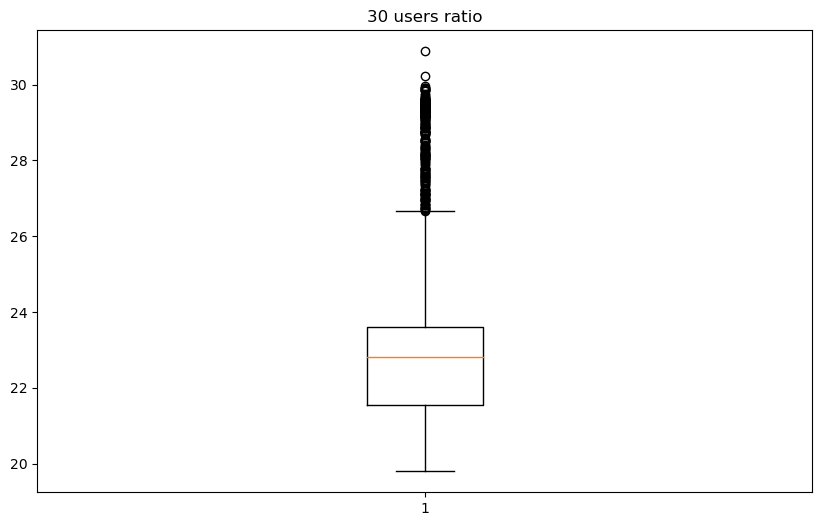

In [15]:
plt.boxplot(Df['30대비율'])
plt.title('30 users ratio')
plt.show()

### 데이터 저장하기

In [16]:
Df.to_csv('7~11월_평균.csv')